# Gaussian
> ### $answer[index] = \frac{(y[index] + np.dot(answer, row))}{diagonal[index]}$
>
> ### $20x + y - 2z = 5$
> ### $3x + 20y - z = 15$
> ### $2x - 3y + 20z = 8$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, y, iteration=30, tolerance=0.065) : 
    # ! ambil diagonal dari si x
    diag = np.array(np.diag(x))
    np.fill_diagonal(x, 0)
    
    # * diagonally domninant or not?
    sum = np.sum(np.abs(x), axis=1)
    
    if not np.all(np.abs(diag) > sum) :
        print("not diagonally dominant")
        return False

    # ? kalau diagonally dominant gas langsung lakuin computationnya 
    x = -x
    mat_old = np.zeros(np.size(x[0])) # ! bikin array buat jawaban
    for i in range(iteration) :
        mat_new = np.array(mat_old)
        for index, row in enumerate(x) :
            mat_new[index] = (y[index] + np.dot(mat_new, row))/diag[index]
        print(f'iteration {i} mat_new: {mat_new}')
        
        distance = np.sqrt(np.dot(mat_new - mat_old, mat_new - mat_old))    
        if distance < tolerance :
            print("Equation is convergent")
            print(f"X Y Z After Gaussian : {mat_new}")
            return True
        mat_old = np.array(mat_new) 
        
    return False


x = np.array([[20, 1, -2], [3, 20, -1], [2, -3, 20]])
y = np.array([5, 15, 8])
print(np.linalg.solve(x, y))
gaussian(x,y)

[0.26165998 0.73495486 0.48407723]
iteration 0 mat_new: [0.25     0.7125   0.481875]
iteration 1 mat_new: [0.2625625  0.73470937 0.48395016]
Equation is convergent
X Y Z After Gaussian : [0.2625625  0.73470937 0.48395016]


True

## Least Square Regression

> ### $\alpha = (A^{T}A)^{-1}A^{T}Y$

In [22]:
import pandas as pd
data = pd.read_csv("./insurance.csv")

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

[[ 257.72261867]
 [3165.88500606]]


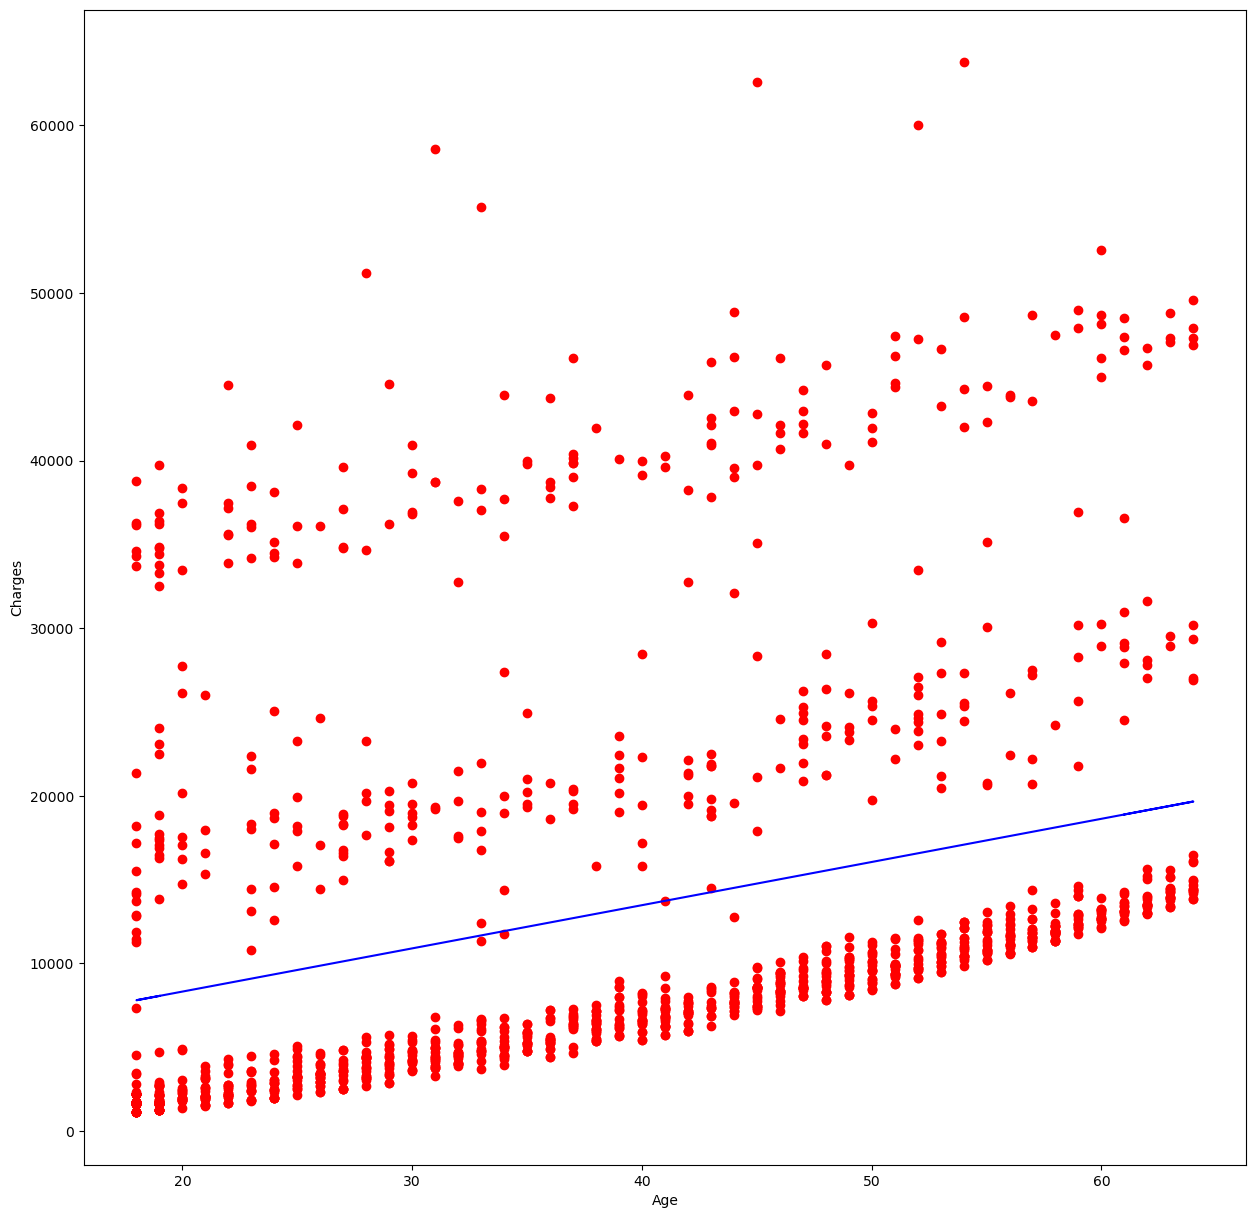

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def leastSquareRegression(x, y) :
    # converting the data we have into a numpy array
    x = np.array(x)
    y = np.array(y)
    
    # ! Preparing the data given
    ones = np.ones(np.size(x))
    A = np.vstack((x, ones)).T
    y = y[:, np.newaxis]
    
    # ! Linear Regression Computation 
    first = np.linalg.inv(np.dot(A.T, A))
    alpha = np.dot(np.dot(first, A.T), y)
    
    print(alpha)
    
    plt.figure(figsize=(15,15))
    plt.plot(x, y, 'ro')
    plt.plot(x, alpha[0] * x + alpha[1], 'b')
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.show()
    
x = data['age']
y = data['charges']
leastSquareRegression(x, y)

## Newton Rhapson
> ## $x_{i+1} = x_{i} - \frac{f(x_{i})}{f^{'}(x_{i})}$
> ## $f(x) = x^{3} + x^{2} + 4x - 12$
> ## $g(x) = 3x^{2} + 2x + 4$

In [42]:
def newtonRhapson(f, g, x, tol=0.065, iteration=30) : 
    for i in range(iteration) :
        x = x - (f(x)/g(x))
        print(f"iteration ke {i} new root = {x}")
        if np.abs(f(x)) < tol : # cek uda less than tolerance nya belum
            print(f"Final answer {x}")
            return x

In [46]:
def f(x) :
    return x**3 + x**2 + 4*x - 12

def g(x) :
    return 3 * x ** 2 + 2 * x + 4

root = newtonRhapson(f, g, 2)
proof = f(root) 
print("")
print(f"Root for the equation is {root}")
print(f"Proof of f(root) (should be under 0.065) : {proof}") 

iteration ke 0 new root = 1.6
iteration ke 1 new root = 1.5290322580645161
Final answer 1.5290322580645161

Root for the equation is 1.5290322580645161
Proof of f(root) (should be under 0.065) : 0.028853814910544173


### Riemann Integration
> ***Yang kita cari***
> 
> ### $\int_{1}^{3}x^{3} + x^{2} + 4x - 12dx$
> ### NOTE THAT $h = \frac{finishPoint - startingPoint}{n}$
> #### Left Riemann = $h * f(points[1:])$
> #### Right Riemann = $h * f(points[:-1])$
> #### Middle Rule = $h * f((points[1:] + points[:-1])/2)$
> #### Trapzeoid Rule = $\frac{h}{2} * (f(points[0]) + f(points[-1]) + 2 * np.sum(f(points[1 : -1])))$
> jawaban 
>
> ### $[\frac{1}{2}x^{4} + x^{3}]_{1}^{3} = 66 $


In [51]:
def equationForRieman(x) : 
    return x**3 + x**2 + 4*x - 12

starting_point = 1
ending_point = 3
interval_amount = 3000
h = (ending_point - starting_point) / interval_amount
points = np.linspace(starting_point, ending_point, interval_amount)


leftRiemann = h * np.sum(f(points[:-1]))
rightRieman = h * np.sum(f(points[1:]))
middleRule = h * np.sum(f((points[:-1] + points[1:])/2))
trapezoidRule = (h/2) * (f(points[0]) + f(points[1]) + 2 * np.sum(f(points[1 : -1])))

print(f"Solution using Left Riemann {leftRiemann}")
print(f"Solution using Right Riemann {rightRieman}")
print(f"Solution using Middle Riemann {middleRule}")
print(f"Solution using Trapezoid Riemann {trapezoidRule}")

Solution using Left Riemann 20.645778815160607
Solution using Right Riemann 20.673778815160606
Solution using Middle Riemann 20.659777259086354
Solution using Trapezoid Riemann 20.645780816420583
